# Classification

We will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv',header = 0)
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Training a Decision Tree Classifier and finding 5 most important features

In [35]:
from sklearn.tree import DecisionTreeClassifier
    
y_train2_reshp = y_train2.values.reshape(6093,1)
    
# Training Decision tree classifier
dtree = DecisionTreeClassifier(random_state = 0).fit(X_train2,y_train2_reshp)
    
#Feature Importance and colummn names
Imp_features = pd.Series(dtree.feature_importances_,index =  X_train2.columns)

# 5 most important features
list(Imp_features.sort_values(ascending = False).index.values[:5])

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Training a Support Vector Classifier and controlling the kernel width, `gamma` from `0.0001` to `10` and retrning mean `Accuracy` for each gamma over 3 cross-validation models

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
y_subset_shp = y_subset.values.reshape((2031,1))
    
#Creating SVC classifier
svc = SVC(kernel = 'rbf',C=1, random_state = 0)
    
gamma = np.logspace(-4,1,6)
    
training_scores, test_scores = validation_curve(svc,X_subset,y_subset,param_name = 'gamma', param_range = gamma, scoring = 'accuracy')
(training_scores.mean(axis = 1),test_scores.mean(axis=1))

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

#### Which model overfits, underfits, and which one is a good generalization?

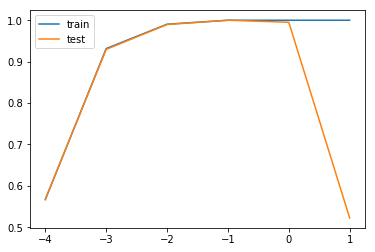

In [37]:
plt.figure()
plt.plot(np.arange(-4,2).reshape((6,)),training_scores.mean(axis = 1), np.arange(-4,2).reshape((6,)),test_scores.mean(axis=1))
plt.legend(['train','test'])
plt.show()

In [38]:
print("Underfitting = {0}, Overfitting = {1}, Good_Generalization = {2}".format(10**-4,10**1,10**-1))

Underfitting = 0.0001, Overfitting = 10, Good_Generalization = 0.1
